In [ ]:
import numpy as np
from plotly.graph_objects import * # more impact graph
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from prophet.plot import plot_plotly
import plotly.express as px
from prophet import Prophet

In [ ]:
import pandas as pd
from prophet import Prophet

# Import google drive and load data



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# read the data
df_train=pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/df_filled.csv')

In [ ]:
df_train.head()

,store_nbr,item_nbr,date,id,unit_sales,onpromotion
0,24,105574,2013-01-02,18790.0,12.0,0.0
1,24,105574,2013-01-03,59692.0,1.0,0.0
2,24,105574,2013-01-04,99664.0,3.0,0.0
3,24,105574,2013-01-05,140805.0,4.0,0.0
4,24,105574,2013-01-06,182800.0,7.0,0.0


In [ ]:
df_train['date']=pd.to_datetime(df_train['date'])
cutoff_date = pd.to_datetime('2014-04-01')
df_train = df_train[df_train['date'] < cutoff_date]


In [ ]:
# Groupby by 'date' and aggregate 'unit_sales' by sum

df_train = df_train.groupby('date')['unit_sales'].sum().reset_index()
df_train.head()


,date,unit_sales
0,2013-01-02,42320.0
1,2013-01-03,32708.0
2,2013-01-04,30849.0
3,2013-01-05,42351.0
4,2013-01-06,43988.0


In [ ]:
# Rename the name of columns for Prophet models
df_train.columns = ['ds', 'y']
df_train.head()


,ds,y
0,2013-01-02,42320.0
1,2013-01-03,32708.0
2,2013-01-04,30849.0
3,2013-01-05,42351.0
4,2013-01-06,43988.0


<Axes: >

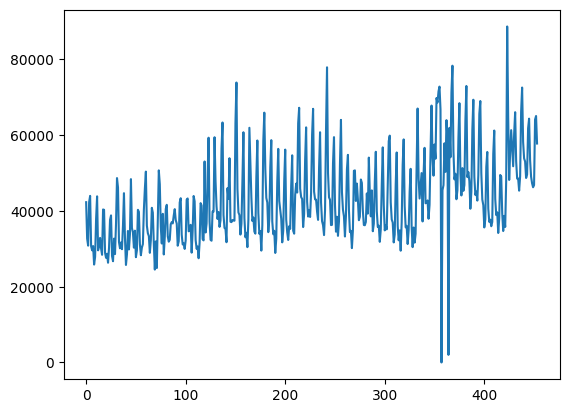

In [ ]:
df_train['y'].plot()

In [ ]:
# Split the data to train and test
train, test = train_test_split(df_train, test_size=0.2, shuffle=False)

In [ ]:
# Set Prophet model
m = Prophet()
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kfy37js/nh1qgs2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kfy37js/xtsoq4u7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12425', 'data', 'file=/tmp/tmp7kfy37js/nh1qgs2p.json', 'init=/tmp/tmp7kfy37js/xtsoq4u7.json', 'output', 'file=/tmp/tmp7kfy37js/prophet_model9vxuxua9/prophet_model-20250513120420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create the future dataframe and used for prediction
future=m.make_future_dataframe(periods=90, freq='D')


In [ ]:
future

,ds
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-05
4,2013-01-06
...,...
449,2014-03-27
450,2014-03-28
451,2014-03-29
452,2014-03-30


In [ ]:
# Making Forecast
forecast=m.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,32844.349092,20299.582497,37058.936434,32844.349092,32844.349092,-4106.807083,-4106.807083,-4106.807083,-4106.807083,-4106.807083,-4106.807083,0.0,0.0,0.0,28737.542009
1,2013-01-03,32896.124825,17211.056708,33573.893284,32896.124825,32896.124825,-7197.800316,-7197.800316,-7197.800316,-7197.800316,-7197.800316,-7197.800316,0.0,0.0,0.0,25698.324509
2,2013-01-04,32947.900558,21164.235974,37850.625816,32947.900558,32947.900558,-3690.970095,-3690.970095,-3690.970095,-3690.970095,-3690.970095,-3690.970095,0.0,0.0,0.0,29256.930462
3,2013-01-05,32999.676290,33091.962902,49398.476724,32999.676290,32999.676290,8510.618120,8510.618120,8510.618120,8510.618120,8510.618120,8510.618120,0.0,0.0,0.0,41510.294410
4,2013-01-06,33051.452023,37230.789392,54152.750626,33051.452023,33051.452023,12600.262125,12600.262125,12600.262125,12600.262125,12600.262125,12600.262125,0.0,0.0,0.0,45651.714148


# Visualization of the forecast by Prophet Model

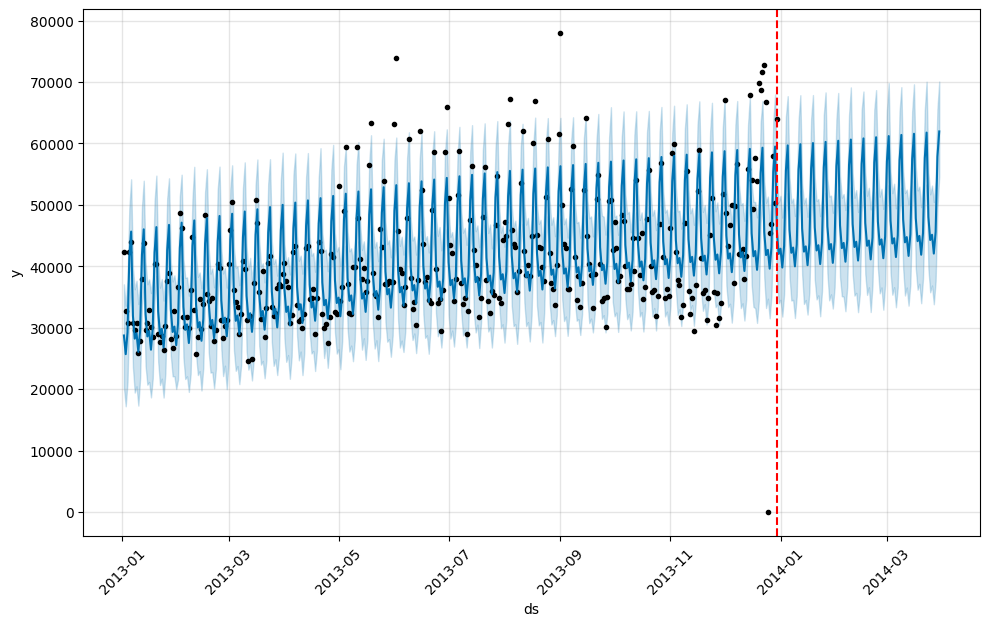

In [ ]:
# plot the forecast result
import matplotlib.pyplot as plt
m.plot(forecast)
plt.axvline(x=forecast['ds'].max()-pd.Timedelta(days=90), color='r', linestyle='--')
plt.xticks(rotation=45)
plt.show()



Explantation: The black dots are given datapoints
Blue lines are the forecast and the shaded areas are confidence intervals
vertical line marks future values


# Cross Validation

In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics



In [ ]:
df_cv = cross_validation(m, horizon = '90 days', period='7d')
df_cv.head()

INFO:prophet:Making 1 forecasts with cutoffs between 2013-10-01 00:00:00 and 2013-10-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kfy37js/b68za4hr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kfy37js/4dhz1q79.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77456', 'data', 'file=/tmp/tmp7kfy37js/b68za4hr.json', 'init=/tmp/tmp7kfy37js/4dhz1q79.json', 'output', 'file=/tmp/tmp7kfy37js/prophet_modelhyg75jza/prophet_model-20250513124203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-10-02,42504.177506,35689.402405,48757.346515,43044.0,2013-10-01
1,2013-10-03,38415.200526,31605.847989,44541.080661,37569.0,2013-10-01
2,2013-10-04,41878.407743,35413.216866,48364.011106,38477.0,2013-10-01
3,2013-10-05,54786.841319,48260.074180,61019.458378,48306.0,2013-10-01
4,2013-10-06,58116.191096,51250.574014,64287.230902,47415.0,2013-10-01


In [ ]:
df_train_p=performance_metrics(df_cv)
df_train_p.head()

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,9 days,2.723498e+07,5218.714273,4211.514190,0.090003,0.094573,0.777778
1,10 days,2.791782e+07,5283.731737,4433.436398,0.090003,0.099672,0.777778
2,11 days,5.521317e+07,7430.556432,6083.448696,0.119226,0.134185,0.666667
3,12 days,5.592203e+07,7478.103159,6176.254613,0.119226,0.133153,0.666667
4,13 days,5.133694e+07,7164.979803,5551.450346,0.090003,0.121336,0.666667


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


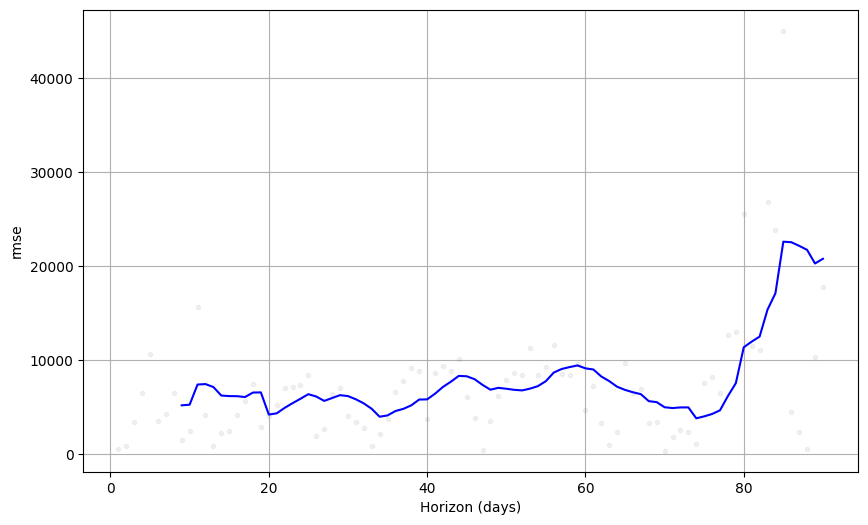

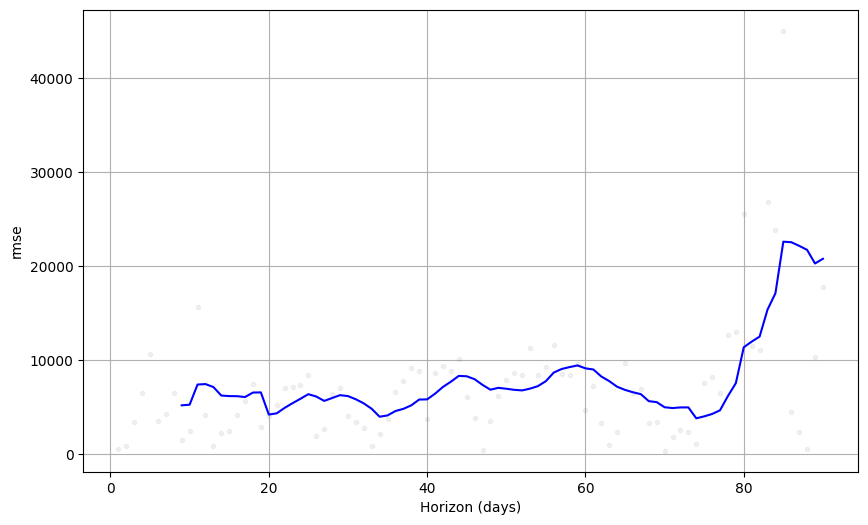

In [ ]:
# Visualization
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(df_cv, metric='rmse')

# The lower rmse means the error between true value and predicted values, the lower value means higher prediction. From 75-90 days the more error of prediction


# 新增區段

In [ ]:
# If we set the initial data as 200d
df_cv_200 = cross_validation(m, horizon = '90 days', period='7d', initial='200d')
df_cv_200.head()

INFO:prophet:Making 11 forecasts with cutoffs between 2013-07-23 00:00:00 and 2013-10-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kfy37js/9qo5jfb_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kfy37js/jff207ve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21879', 'data', 'file=/tmp/tmp7kfy37js/9qo5jfb_.json', 'init=/tmp/tmp7kfy37js/jff207ve.json', 'output', 'file=/tmp/tmp7kfy37js/prophet_modeln4i5alid/prophet_model-20250513124830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:48:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:48:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kfy37js/8z5vd6ye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7kfy37js/x6vksfs4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-07-24,41301.137641,34789.933563,47311.287404,32349.0,2013-07-23
1,2013-07-25,36853.965929,30883.376606,42946.759190,35973.0,2013-07-23
2,2013-07-26,40654.361876,34457.638547,46867.598778,35263.0,2013-07-23
3,2013-07-27,52738.654141,46333.330664,58855.360298,46647.0,2013-07-23
4,2013-07-28,54614.190293,48666.334694,60614.910716,54699.0,2013-07-23


In [ ]:
df_train_p_200=performance_metrics(df_cv_200)
df_train_p_200.head()

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,9 days,3.514923e+07,5928.678636,4808.236839,0.104689,0.110175,0.707071
1,10 days,3.507092e+07,5922.070972,4849.679750,0.105041,0.110915,0.707071
2,11 days,3.720470e+07,6099.565489,5058.152351,0.099499,0.110902,0.727273
3,12 days,4.433827e+07,6658.698848,5408.938261,0.096496,0.112251,0.686869
4,13 days,4.158139e+07,6448.363191,5135.386829,0.091061,0.108702,0.717172


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


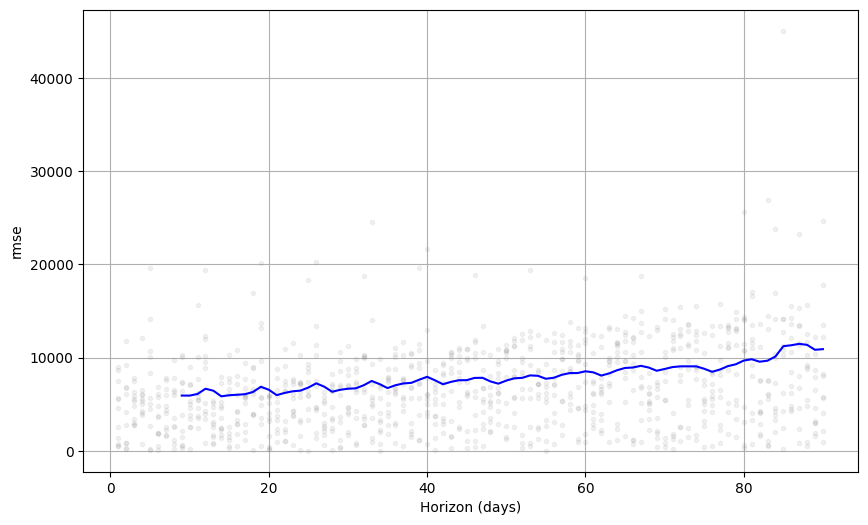

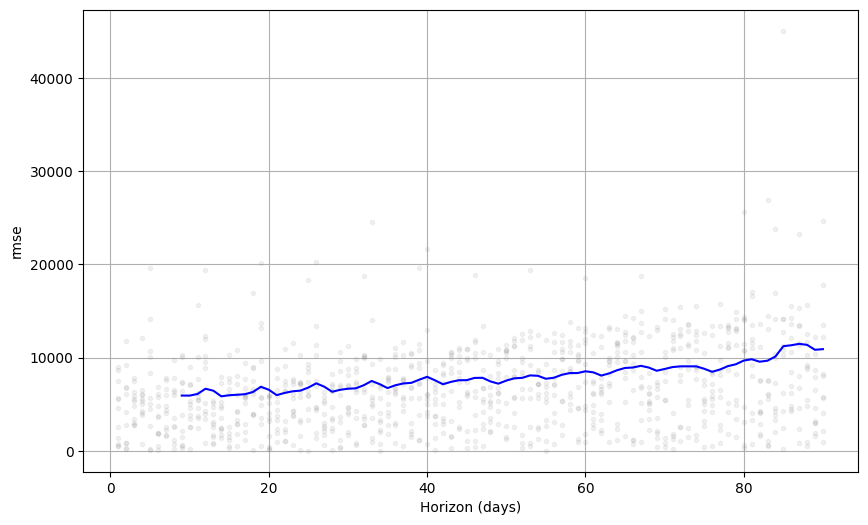

In [ ]:
# Visualization
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(df_cv_200, metric='rmse')

It looks better.More data used as trained data


In [ ]:
# save mode in google drive
import pickle
# define the path to save the model
model_path='/content/drive/MyDrive/models/propehet_model.pkl'

# saving  xgboost_model model
with open(model_path, 'wb') as file:
    pickle.dump(m, file)
print(f"Model saved as pickle file at:{model_path}")


Model saved as pickle file at:/content/drive/MyDrive/models/propehet_model.pkl
